In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


iris = sns.load_dataset("iris")

sns.set_style("whitegrid")

In [39]:
iris.shape

(150, 5)

In [40]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [41]:
iris["species"].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

This is a balanced dataset.

### Scatter plot for 2-d visualisation

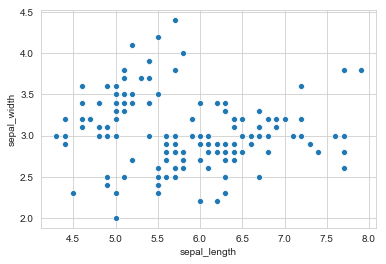

In [42]:
sns.scatterplot(x='sepal_length',y='sepal_width',data=iris)

This doesn't make much sense. Let's plot it with colouring by species

C:\Users\DELL\Anaconda3\envs\kaggle\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


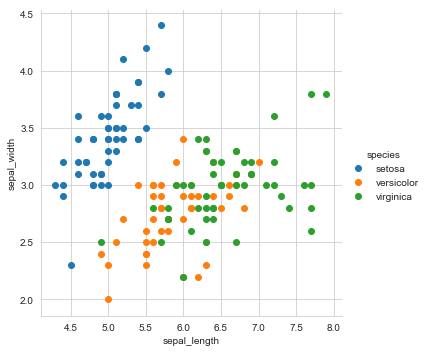

In [43]:
sns.FacetGrid(data=iris,hue='species',size=5)\
    .map(plt.scatter,"sepal_length","sepal_width")\
    .add_legend()

plt.show()

Obeservations : 
1. sepal_length and sepal_width can be used to classify setosa flowers.
2. versicolor and virgina cannot be classified using these two features because there is an overlap.

### Pair plot for 2-D scatter plots

C:\Users\DELL\Anaconda3\envs\kaggle\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


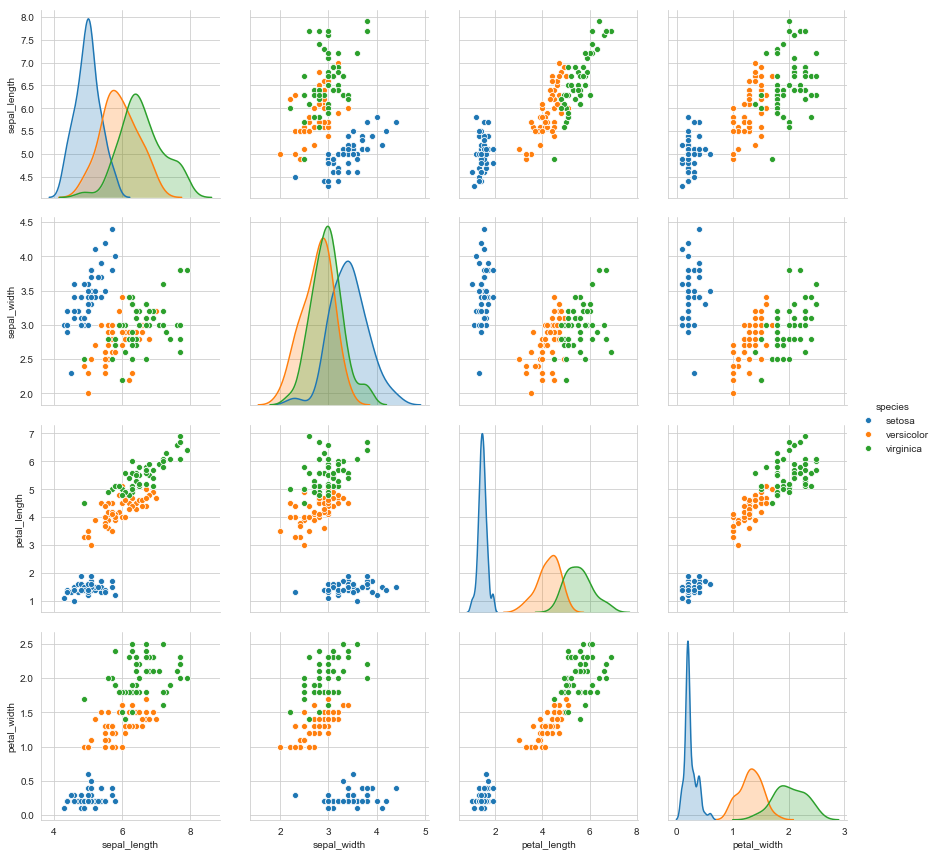

In [44]:
plt.close();
sns.pairplot(data=iris,hue='species',size=3)

Obeservations:
1. petal_length and petal_width is the most important feature to identify setosa flowers.
2. while setosa can be easily classified(linearly separable), virginica and versicolor have some overlap(almost linearly separable).
3. we can write if-else conditions to create a simple model.

### Histogram, PDF, CDF univariate analysis

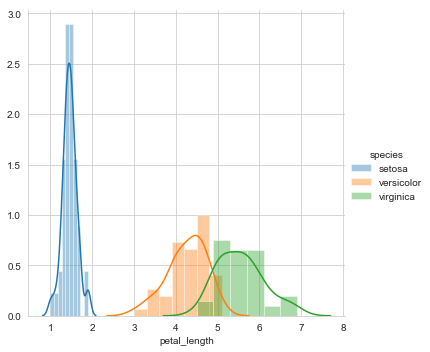

In [45]:
sns.FacetGrid(data=iris, hue='species',height=5)\
    .map(sns.distplot,'petal_length')\
    .add_legend()

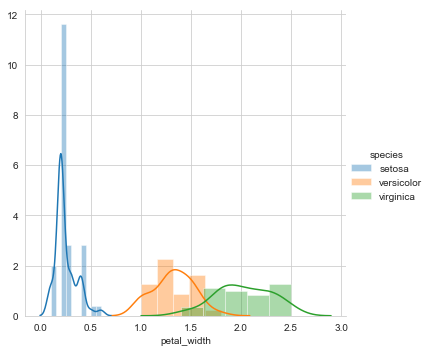

In [46]:
sns.FacetGrid(data=iris, hue='species',height=5).map(sns.distplot,'petal_width').add_legend()

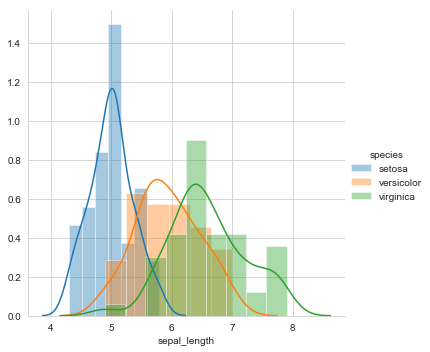

In [47]:
sns.FacetGrid(data=iris,hue='species',height=5).map(sns.distplot,'sepal_length').add_legend()

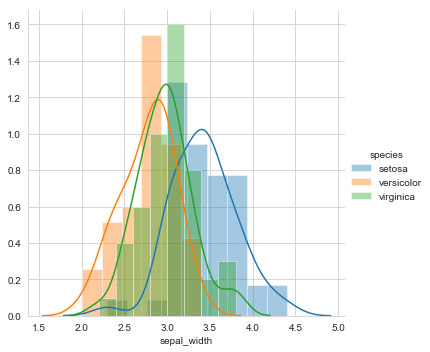

In [48]:
sns.FacetGrid(data=iris,hue='species',height=5).map(sns.distplot,'sepal_width').add_legend()

Observations:
1. petal_length can be used to identify setosa because it is separated out by the other species on this feature.

### CDF

In [49]:
# pdf are unable to see what percentage of population is below a number. 
# cdf are useful because we can easily say what percentage of population is below a number.


In [50]:
iris_setosa = iris.loc[iris["species"] == "setosa"];
iris_virginica = iris.loc[iris["species"] == "virginica"];
iris_versicolor = iris.loc[iris["species"] == "versicolor"];

In [51]:
counts, bin_edges = np.histogram(iris_setosa['petal_length'],bins=10, density=True)

[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


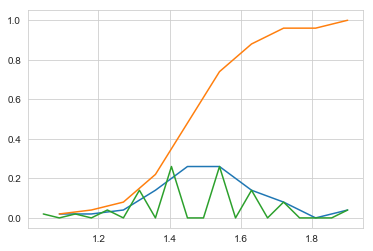

In [52]:
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=20, density=True)

pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show()

[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


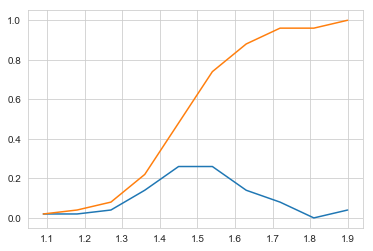

In [53]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 1.6?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

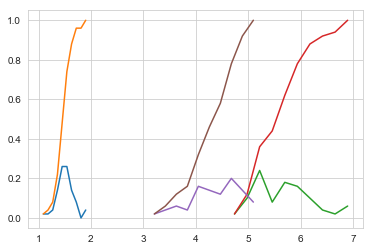

In [54]:
# cdf of petal_length for various types of flowers


# setosa
counts, bin_edges = np.histogram(iris_setosa['petal_length'],bins=10, density=True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

# virginica
counts, bin_edges = np.histogram(iris_virginica['petal_length'],bins=10, density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

# versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal_length'],bins=10,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show()

### Mean, variance and std-dev

In [57]:
print('means')
print(np.mean(iris_setosa['petal_length']))

# mean with an outlier
print(np.mean(np.append(iris_setosa['petal_length'],50)))

print('\nstd-dev')
print(np.std(iris_setosa['petal_length']))

means
1.4620000000000002
2.4137254901960787

std-dev
0.17191858538273286


### Median, Percentile, Quantile, IQR, MAD

In [61]:
print('Medians')
print(np.median(iris_setosa['petal_length']))

# median with an outlier
print(np.median(iris_setosa['petal_length']),50)

print('\nQuantiles')
print(np.percentile(iris_setosa['petal_length'],np.arange(0,100,25)))

print('\n90th percentiles')
print(np.percentile(iris_setosa['petal_length'],90))
print()

# Median Absolute Deviation
from statsmodels import robust
print('median absolute deviation')
print(robust.mad(iris_setosa['petal_length']))

Medians
1.5
1.5 50

Quantiles
[1.    1.4   1.5   1.575]

90th percentiles
1.7

median absolute deviation
0.14826022185056031


### Box plots and whiskers

In [62]:
# another method of visualising 1-d scatter plot

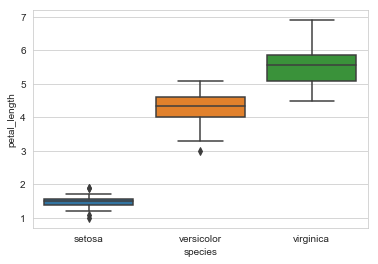

In [64]:
sns.boxplot(x='species',y='petal_length',data=iris)

### Violin plots

In [65]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

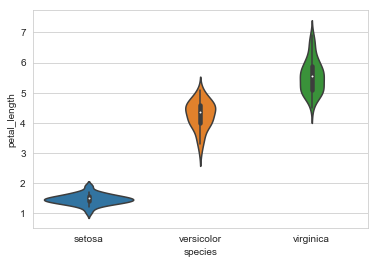

In [66]:
sns.violinplot(x='species',y='petal_length',data=iris)

### Multivariate probability density, contour plots

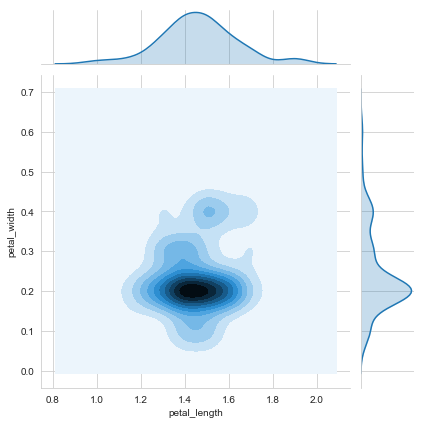

In [67]:
sns.jointplot(x='petal_length',y='petal_width',data=iris_setosa,kind='kde')